In [1]:
# ---------------------------- #
#     Fix import structure     #
# ---------------------------- #
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
module_path = os.path.abspath('../../..')
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
from examples.RTP.env import RTP
from examples.RTP.main import run_game, create_models

# ---------------------------- #
#    Run game test with viz    #
# ---------------------------- #

parameters = {
    'world_size': 20, # Size of the environment
    'num_models': 1, # Number of agents. Right now, only supports 1
    'sync_freq': 200, # Parameters related to model soft update. TODO: Figure out if these are still needed
    'model_update_freq': 4, # Parameters related to model soft update. TODO: Figure out if these are still needed 
    'epsilon': 0.3, # Exploration parameter
    'conditions': ['EWA', 'implicit_attitude'], # Model run conditions
    'epsilon_decay': 0.999, # Exploration decay rate
    'episodic_decay_rate': 1.0, # EWA episodic decay rate
    'similarity_decay_rate': 40.0,
    'epochs': 4000, # Number of epochs
    'max_turns': 20, # Number of turns per game
    'object_memory_size': 12000, # Size of the memory buffer
    'knn_size': 5, # Size of the nearest neighbours
    'RUN_PROFILING': False, # Whether to time each epoch
    'log': False, # Tensorboard support. Currently disabled
    'contextual': False, # Whether the agents' need changes based on its current resource value or stays static
    'appearance_size': 20
}

# Run model with all of the conditions
for condition in range(len(parameters['conditions'])):
        all_models = create_models(
            appearance_size = parameters['appearance_size'],
            episodic_decay_rate = parameters['episodic_decay_rate'],
            similarity_decay_rate = parameters['similarity_decay_rate'],
            knn_size = parameters['knn_size']
        )

        env = RTP(
            height=parameters['world_size'],
            width=parameters['world_size'],
            layers=1,
            contextual=parameters['contextual']
        )

        all_models, env = run_game(
            all_models,
            env,
            epsilon=parameters['epsilon'],
            epochs=parameters['epochs'],
            max_turns=parameters['max_turns'],
            epsilon_decay=parameters['epsilon_decay'],
            condition=parameters['conditions'][condition],
            sync_freq=parameters['sync_freq'],
            model_update_freq=parameters['model_update_freq'],
            RUN_PROFILING=parameters['RUN_PROFILING']
        )

20 21 -124 [6, 11, 74] 636.5910782814026 0.2937626027894116 0 EWA
40 21 -58 [8, 7, 68] 898.4025156497955 0.28794283215752287 0 EWA
60 21 48 [16, 9, 22] 564.1848026514053 0.2822383577882836 0 EWA
80 21 52 [12, 4, 28] 345.8514493703842 0.27664689553184973 0 EWA
100 21 62 [11, 4, 8] 283.23606979846954 0.2711662064899787 0 EWA
120 21 6 [8, 5, 24] 267.3062496781349 0.26579409611954335 0 EWA
140 21 44 [13, 7, 16] 300.8649049401283 0.2605284133538074 0 EWA
160 21 107 [15, 4, 3] 404.7766261100769 0.2553670497411083 0 EWA
180 21 77 [14, 5, 13] 264.2863612771034 0.25030793860060435 0 EWA
200 21 125 [14, 1, 5] 244.93636572360992 0.2453490541947473 0 EWA
220 21 -46 [4, 8, 6] 425.15831100940704 0.24048841091814935 0 EWA
240 21 11 [9, 6, 19] 416.1162556409836 0.23572406250251945 0 EWA
260 21 4 [8, 7, 6] 430.3841081857681 0.23105410123735085 0 EWA
280 21 128 [19, 5, 12] 411.58354234695435 0.22647665720604732 0 EWA
300 21 32 [12, 7, 18] 374.5064786672592 0.22198989753718318 0 EWA
320 21 25 [13, 9, 15]

: 

Took action: down. Received -1.


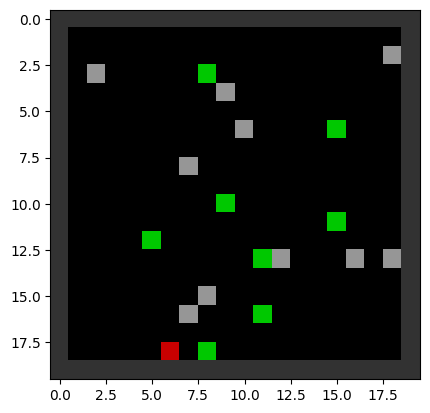

Game over. Received 4 total reward.


In [31]:
from examples.RTP.utils import run_one_game

run_one_game(
    all_models,
    condition='None',
    env=env,
    max_turns=20,
    save = False,
    run_id=2
)